In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
DataPath = '/Users/emadezzeldin/Dropbox/PhD/HackerRank/HackerRankChallnges/PolynomialRegression_OfficePrices/Modeling/Data/'
X_train  =  pd.read_csv (DataPath+'TrainingData_Predictors.csv')
#x_test   =  pd.read_csv (DataPath+'TestData_Predictors.csv')
Y_train  =  pd.read_csv (DataPath+ 'TrainingData_Responce.csv')
Y_train  = Y_train ['Responce']
#y_test   =  pd.read_csv (DataPath+ 'TestData_Responce.csv')
print ('=='*40)
print ('Training Data Predictors')
print (X_train)
print ('=='*40)
print ('Training Data Responce')
print (Y_train)
#print ('=='*40)
#print ('Test Data Predictors')
#print (x_test)
#print ('=='*40)
#print ('Test Data Predictors')
#print (y_test)

Training Data Predictors
    Predictor1  Predictor2
0         0.44        0.68
1         0.99        0.23
2         0.84        0.29
3         0.28        0.45
4         0.07        0.83
5         0.66        0.80
6         0.73        0.92
7         0.57        0.43
8         0.43        0.89
9         0.27        0.95
10        0.43        0.06
11        0.87        0.91
12        0.78        0.69
13        0.90        0.94
14        0.41        0.06
15        0.52        0.17
16        0.47        0.66
17        0.65        0.43
18        0.85        0.64
19        0.93        0.44
20        0.41        0.93
21        0.36        0.43
22        0.78        0.85
23        0.69        0.07
24        0.04        0.52
25        0.17        0.15
26        0.68        0.13
27        0.84        0.60
28        0.38        0.40
29        0.12        0.65
..         ...         ...
70        0.02        0.28
71        0.89        0.48
72        0.02        0.56
73        0.92        0.03
74 

<IPython.core.display.Javascript object>


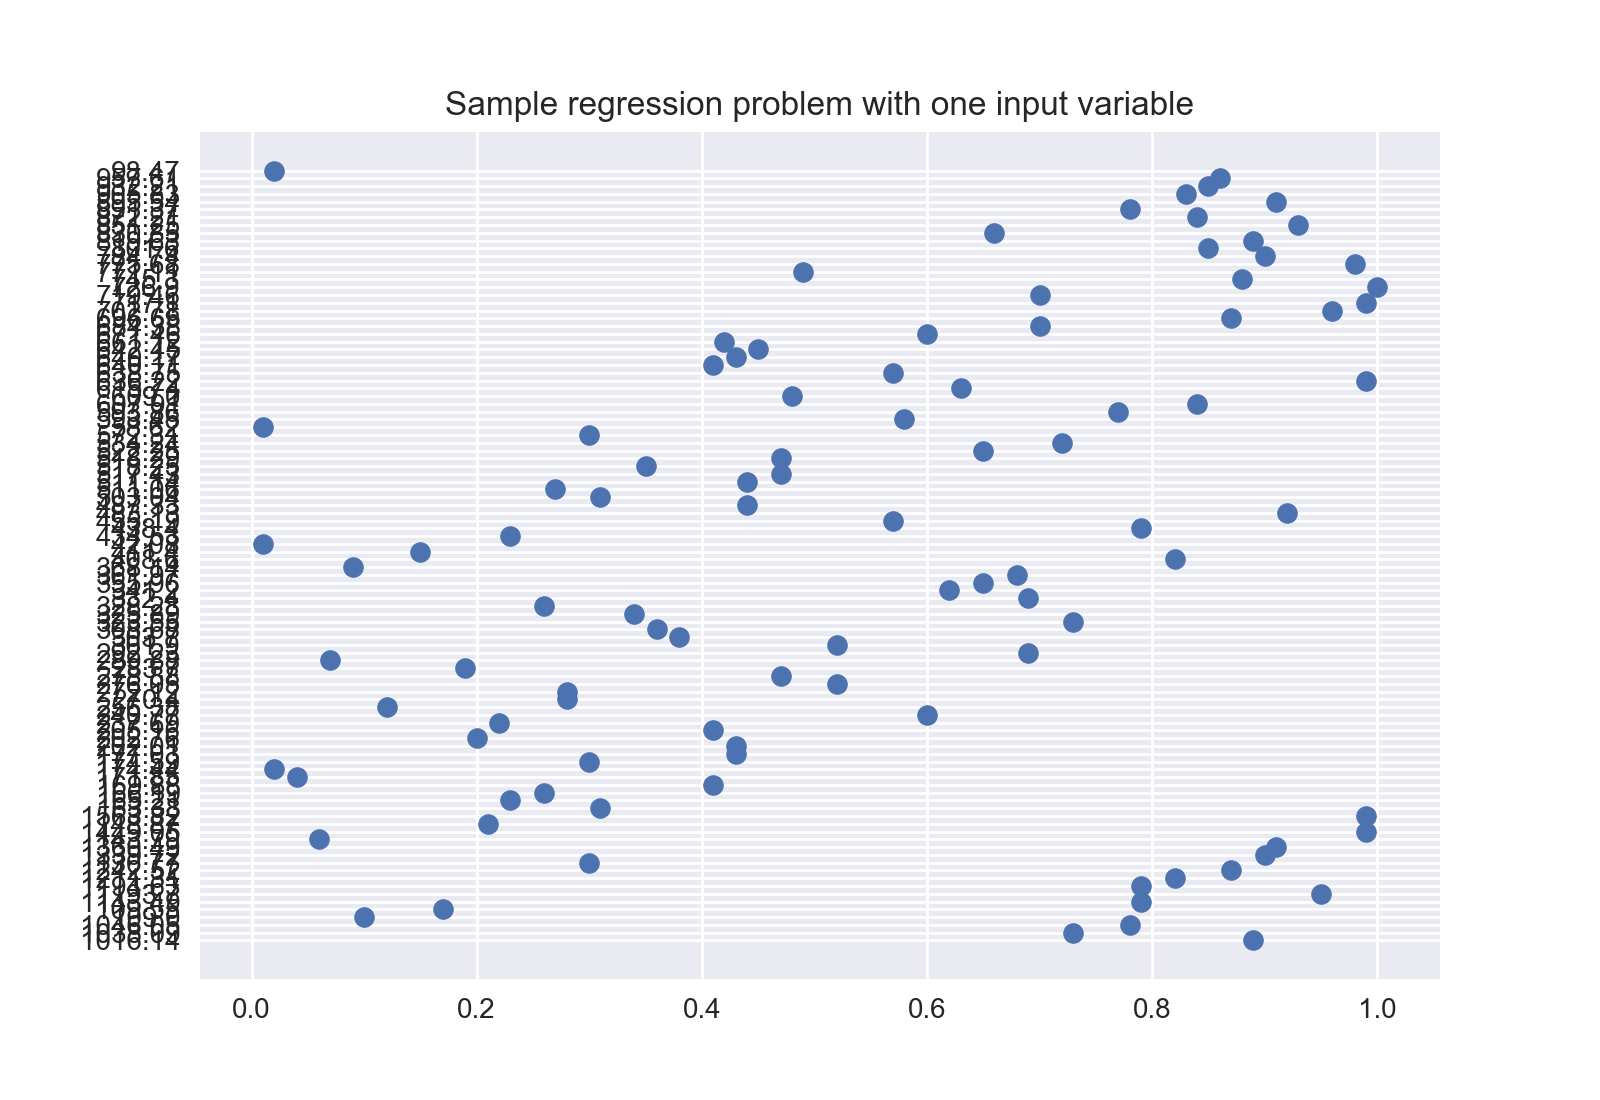

<IPython.core.display.Javascript object>


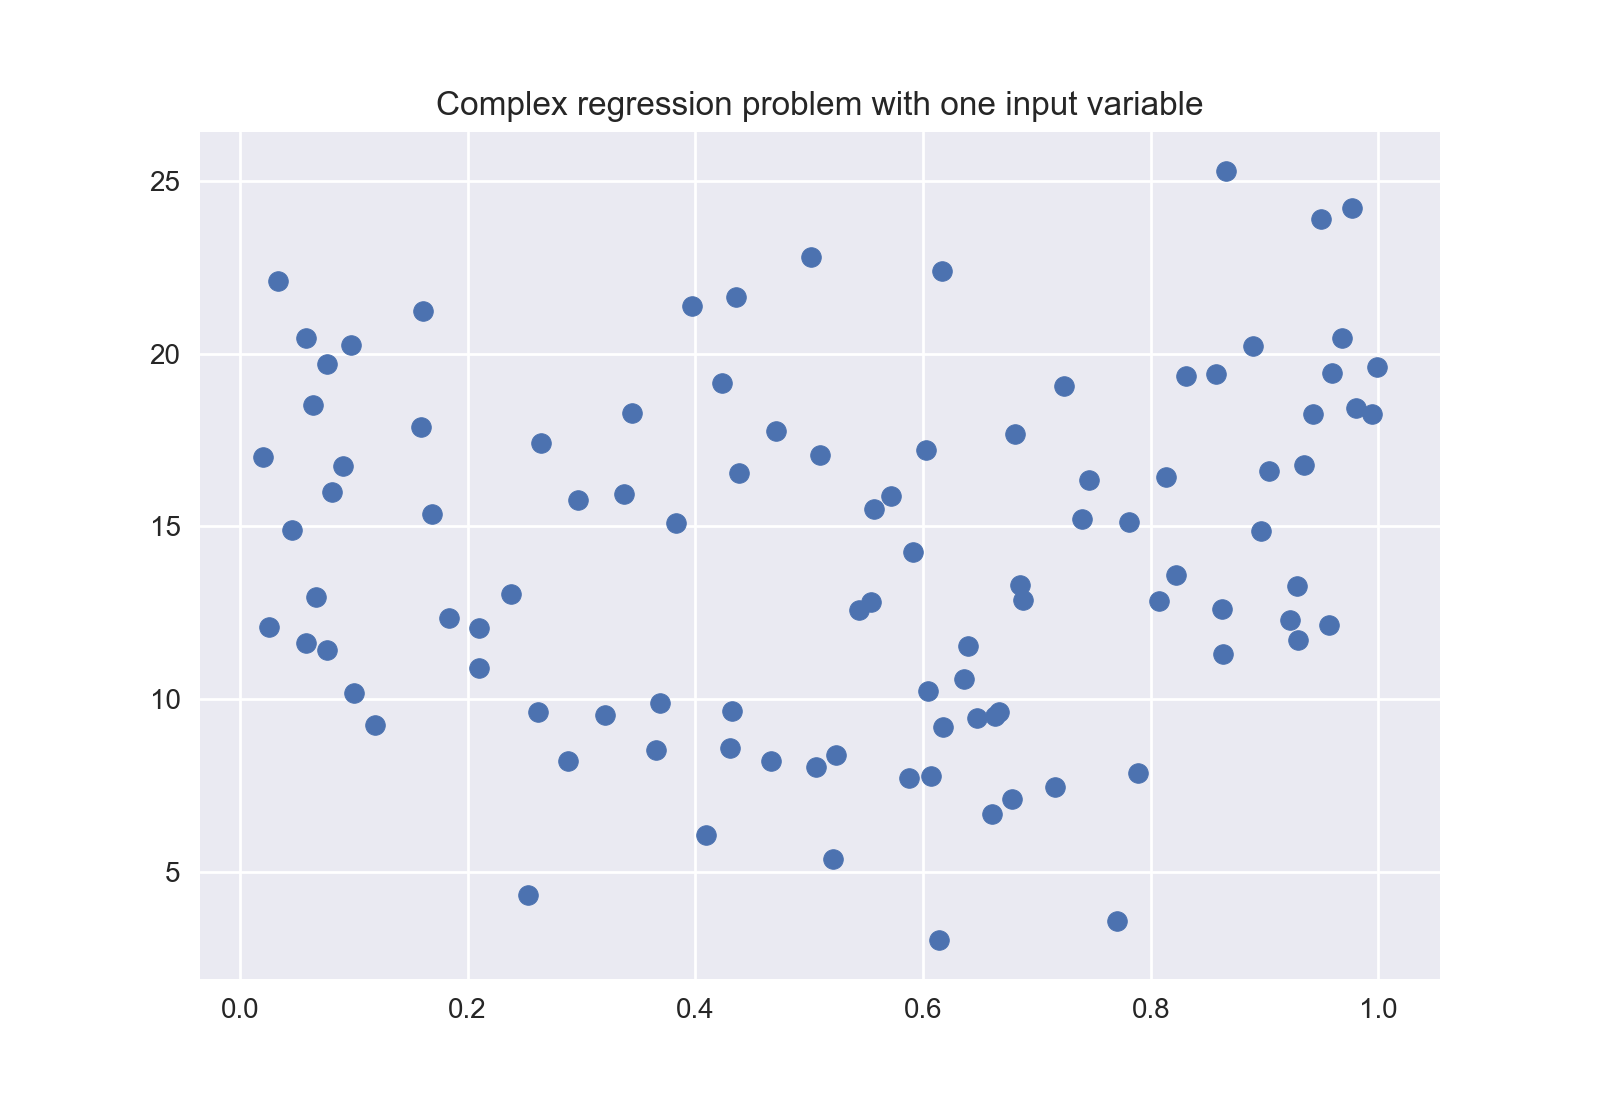

<IPython.core.display.Javascript object>


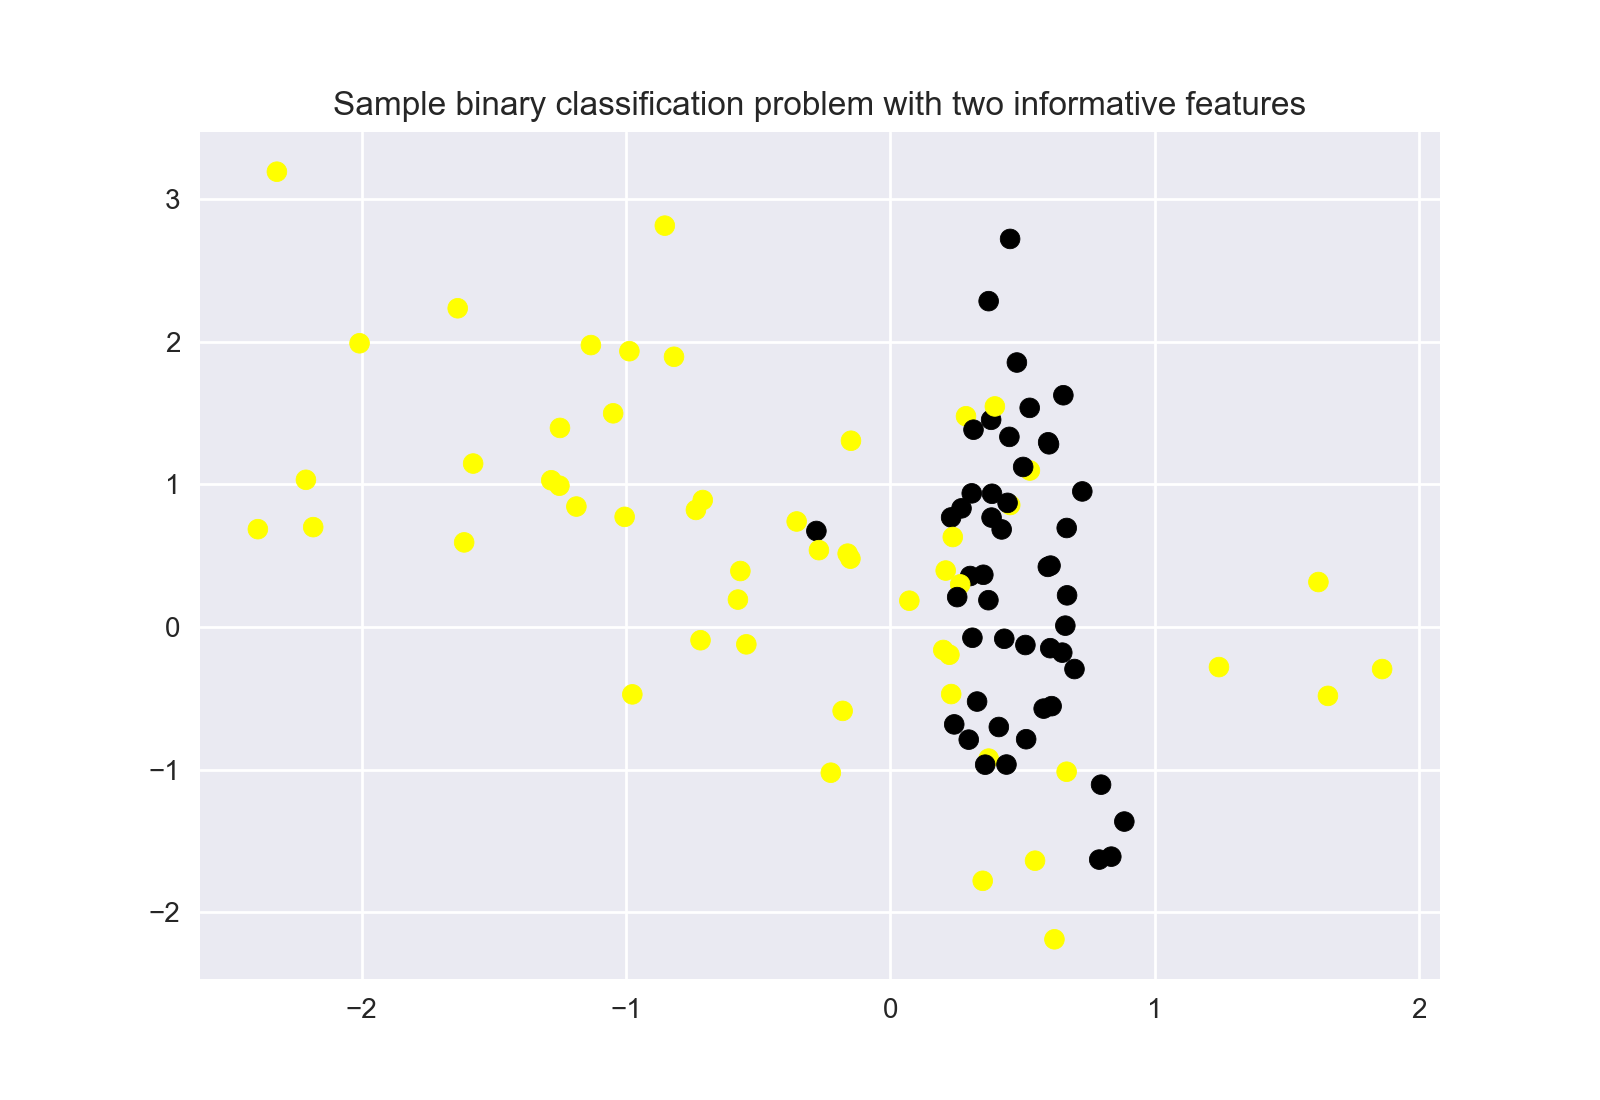

<IPython.core.display.Javascript object>


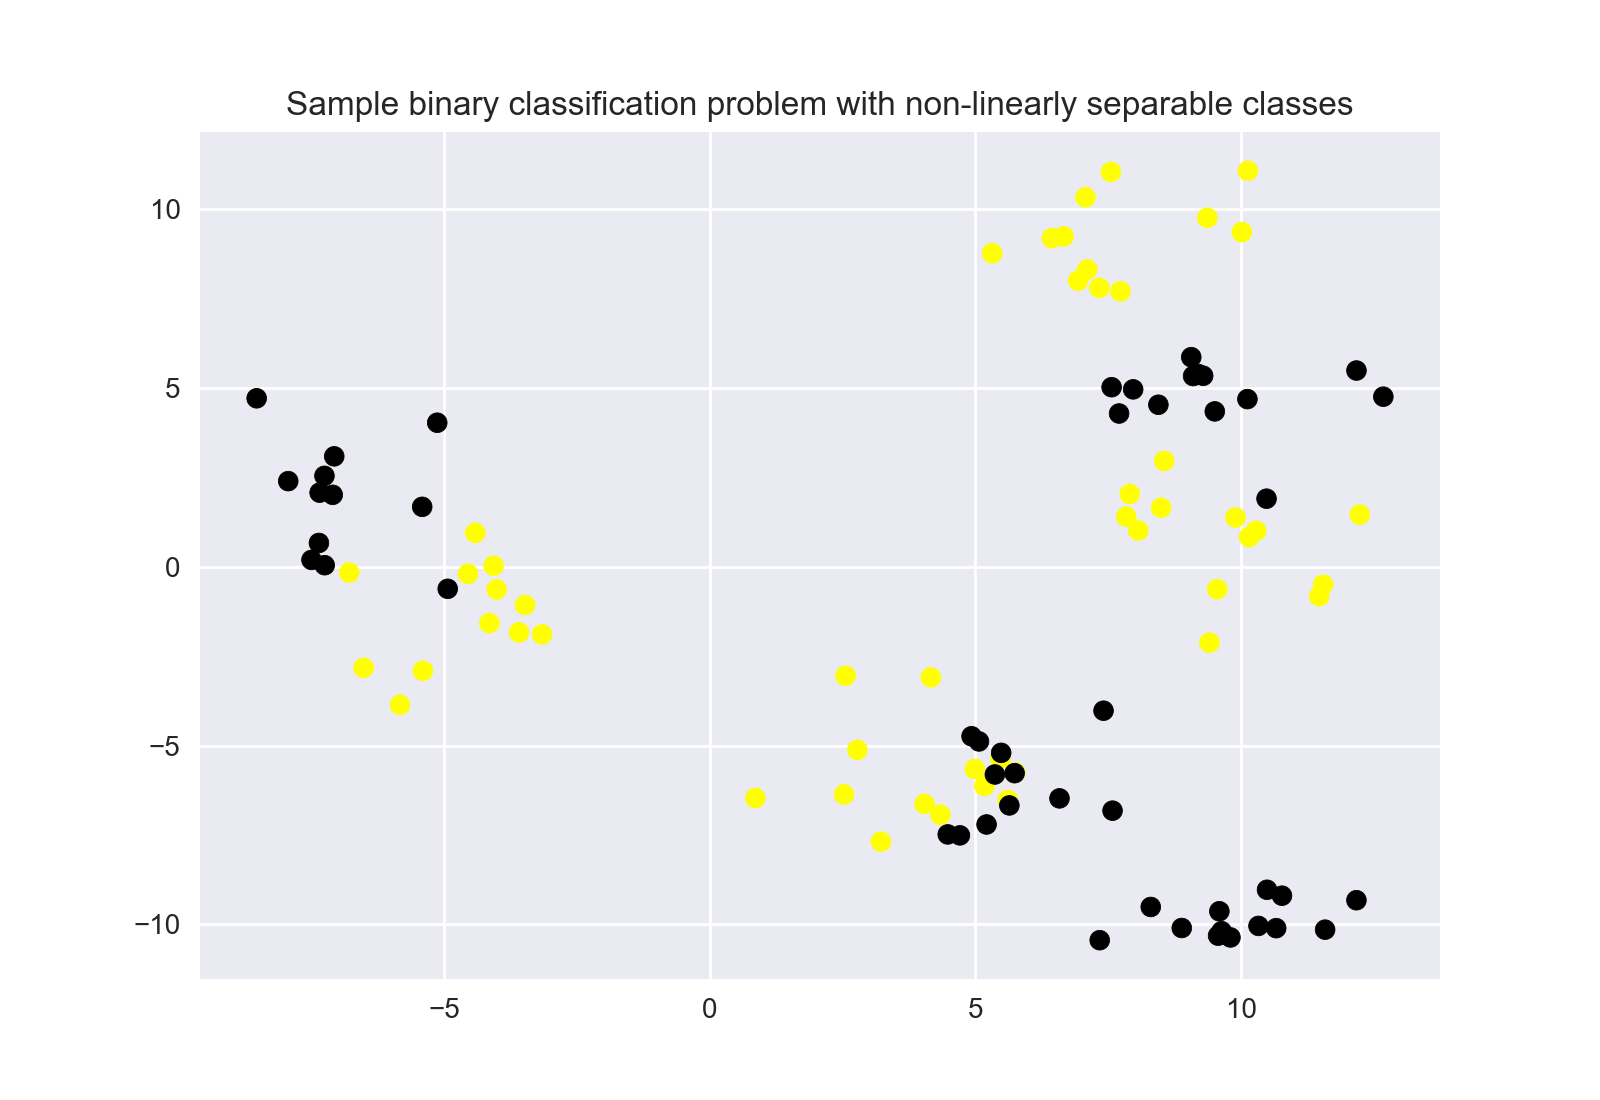

In [23]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

<IPython.core.display.Javascript object>


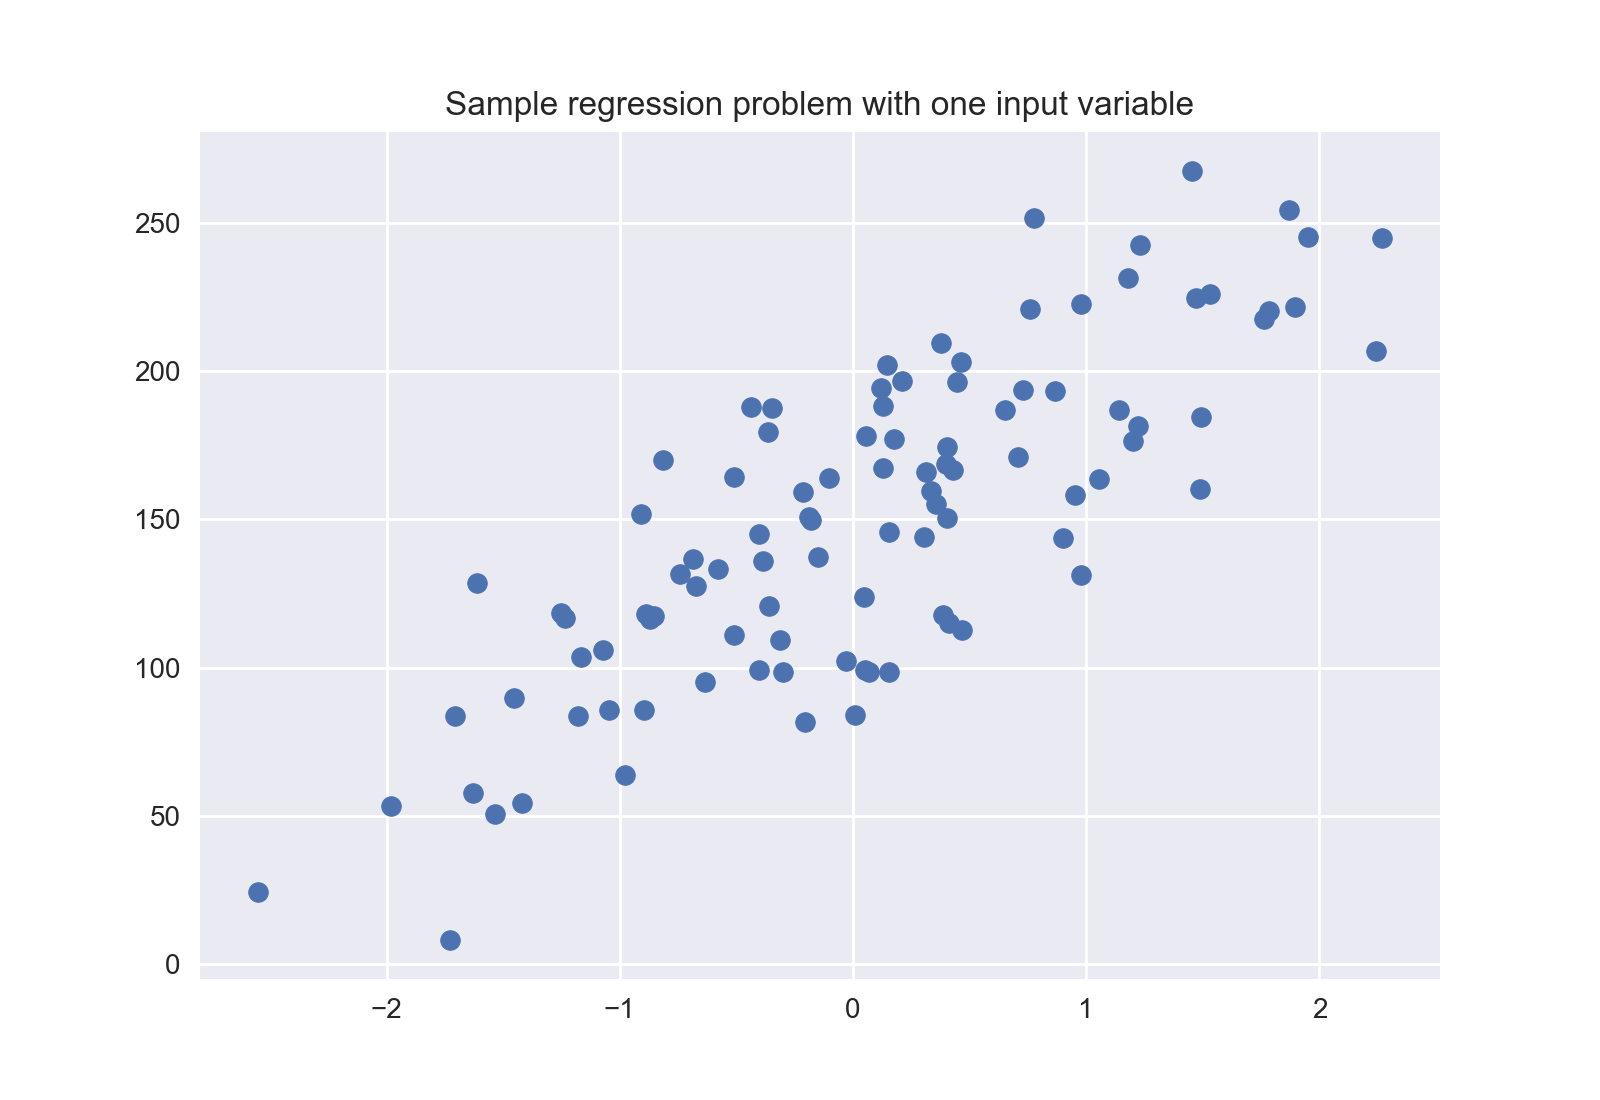

In [37]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [43]:
X_R1 , y_R1 = X_train , Y_train

In [44]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)
print (y_train)
print (x_train)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

48      42.08
6     1038.09
99     593.86
82     684.38
76     957.61
60     905.83
80     784.74
90     661.12
68     165.21
51     642.45
27     872.21
18     932.21
56     109.00
63     202.01
74     534.24
1      717.10
61     487.33
42     593.45
41     174.59
4      289.88
15     276.05
17     522.25
40     609.00
38     240.77
5      830.85
91     771.11
59    1360.49
0      511.14
34     518.25
28     303.70
       ...   
19     851.25
29     256.38
49     166.19
97     696.65
98     434.53
69     438.40
20     640.11
94     325.89
72     174.44
77     518.29
25     109.55
37     163.38
81     283.70
46     278.88
39    1449.05
65     745.30
58     205.16
12     891.37
88     323.55
70      98.47
87     801.60
36     301.90
21     308.68
83     719.46
9      511.06
96     272.12
67    1563.82
64     148.87
47     411.40
44     671.46
Name: Responce, Length: 75, dtype: float64
    Predictor1  Predictor2
0         0.44        0.68
1         0.99        0.23
2         0.84        

In [45]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>

ValueError: query data dimension must match training data dimension

In [46]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


<IPython.core.display.Javascript object>

ValueError: query data dimension must match training data dimension

LINEAR REGRESSION

In [47]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 875.98  649.04]
linear model intercept (b): -252.444
R-squared score (training): 0.934
R-squared score (test): 0.954


<IPython.core.display.Javascript object>


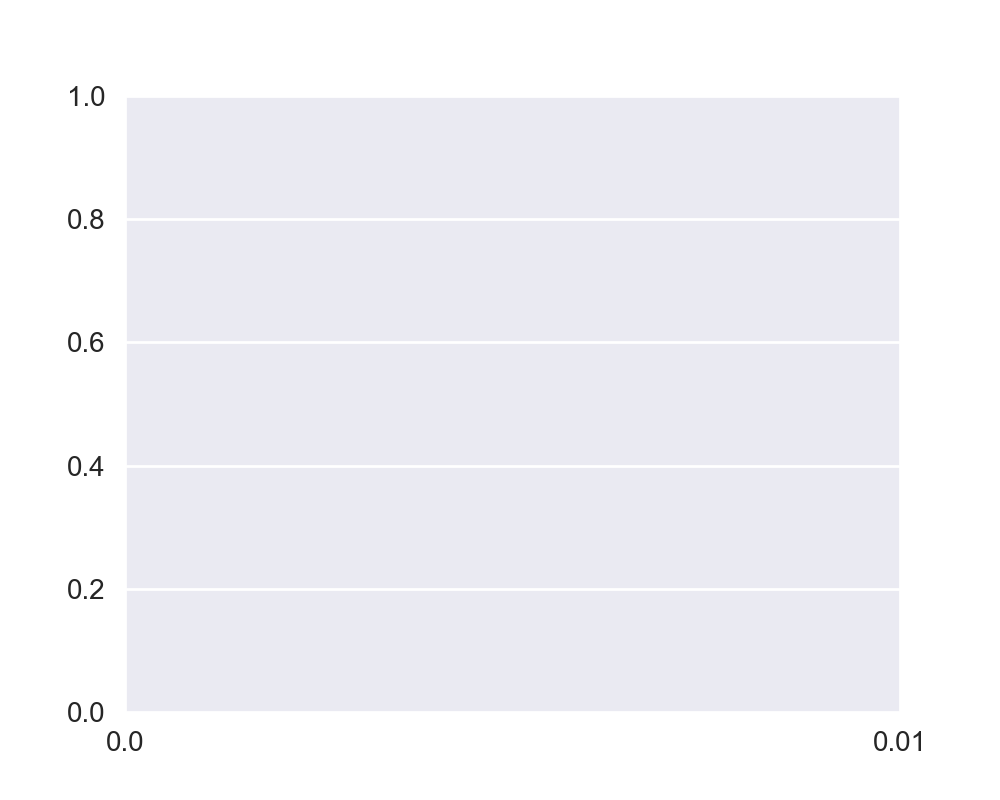

ValueError: x and y must be the same size

In [48]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.130672488688
linear model coeff:
[  1.62e-03  -9.43e+01   1.36e+01  -3.13e+01  -8.15e-02  -1.69e+01
  -2.43e-03   1.53e+00  -1.39e-02  -7.72e+00   2.28e+01  -5.66e+00
   9.35e+00   2.07e-01  -7.43e+00   9.66e-03   4.38e-03   4.80e-03
  -4.46e+00  -1.61e+01   8.83e+00  -5.07e-01  -1.42e+00   8.18e+00
  -3.87e+00  -3.54e+00   4.49e+00   9.31e+00   1.74e+02   1.18e+01
   1.51e+02  -3.30e+02  -1.35e+02   6.95e-01  -2.38e+01   2.77e+00
   3.82e-01   4.39e+00  -1.06e+01  -4.92e-03   4.14e+01  -1.16e-03
   1.19e+00   1.75e+00  -3.68e+00   1.60e+00  -8.42e+00  -3.80e+01
   4.74e+01  -2.51e+01  -2.88e-01  -3.66e+01   1.90e+01  -4.53e+01
   6.83e+02   1.04e+02  -3.29e+02  -3.14e+01   2.74e+01   5.12e+00
   6.92e+01   1.98e-02  -6.12e-01   2.65e+01   1.01e+01  -1.59e+00
   2.24e+00   7.38e+00  -3.14e+01  -9.78e-05   5.02e-05  -3.48e-04
  -2.50e-04  -5.27e-01  -5.17e-01  -4.10e-01   1.16e-01   1.46e+00
  -3.04e-01   2.44e+00  -3.66e+01   1.41e-01   2.89e

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

print (y_test)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_R1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)
print ('Test Data')
print (x_test)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_R1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

26     361.97
86     130.77
2      607.91
55     143.79
75     572.31
93     237.69
16     517.43
73     483.13
54     615.74
95     636.22
53     702.78
92    1016.14
78    1143.49
13    1339.72
7      455.19
30     341.20
22    1046.05
24     171.85
33     895.54
8      640.17
43     355.96
62     202.76
3      270.40
71     819.63
45    1193.70
Name: Responce, dtype: float64
linear model coeff (w): [ 875.98  649.04]
linear model intercept (b): -252.444
R-squared score (training): 0.934
R-squared score (test): 0.954

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

Test Data
   Predictor1  Predictor2
0        0.05        0.54
1        0.91        0.91
2        0.31        0.76
3        0.51        0.31
(poly deg 2) linear model coeff (w):
[   0.    -26.42   28.05  488.16  791.85  206.93]
(poly deg 2) linear model intercept (b): 72.345
(poly deg 2) R-squared score (training): 0.999
(poly deg 2) R-squared score (test): 0.999


Addition of 

In [14]:
#example_fruit = [[5.5, 2.2, 10, 0.70]]
#print('Predicted fruit type for ', example_fruit, ' is ', 
#      target_names_fruits[knn.predict(example_fruit)[0]-1])